<a href="https://colab.research.google.com/github/yagiyuki/machine_learning/blob/main/importance_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 機械学習の特徴量の重要度を表示・活用するレシピ

* 機械学習のアルゴリズムの一つ「ランダムフォレスト」の利用方法
* 特徴量の重要度を表示・活用する方法

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [24]:
# タイタニックのデータ
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [26]:
# 文字列形式のデータを数値に置き換え
encode_cols = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

for f in encode_cols:
    lbl = LabelEncoder()
    df[f] = lbl.fit_transform(list(df[f].values))

In [27]:
# 数値系データの欠損値を平均値で補完
encode_cols = ['age', 'fare']

for f in encode_cols:
    df[f].fillna(df[f].mean(), inplace=True)

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


In [29]:
# 生存を予測するモデルを作るので、survived のカラムを目的変数 yとして切り出し
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## ランダムフォレストの学習・予測

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [31]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
y_pred[:5]

array([0, 1, 1, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8

## 特徴量の重要度の表示・活用



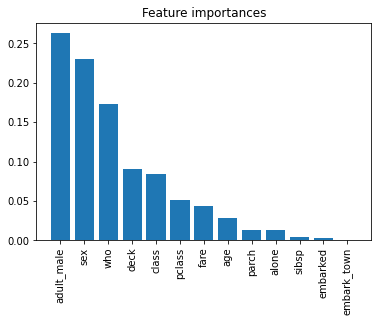

In [34]:
import numpy as np
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()